In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# 4. Feature Selection
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]  # independent variables
y = data['Price'] 

In [6]:
# 5. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 10089009300.89
R² Score: 0.92


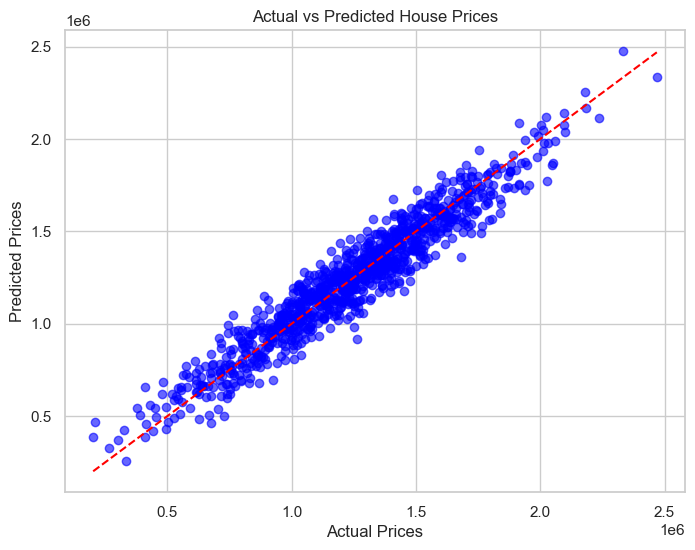

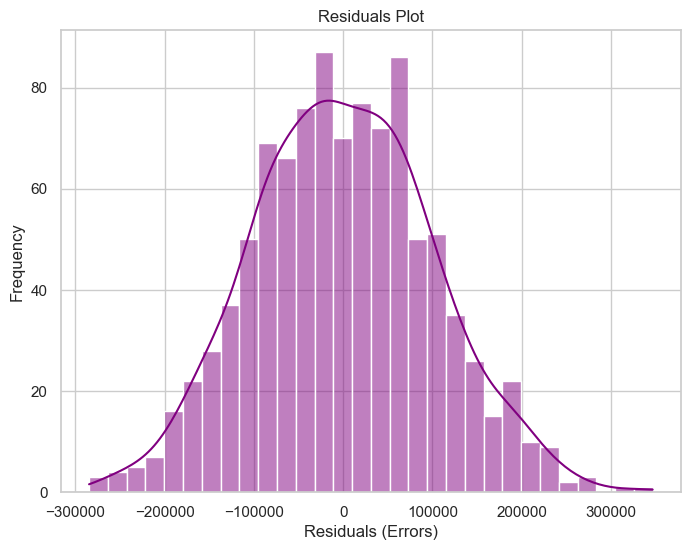

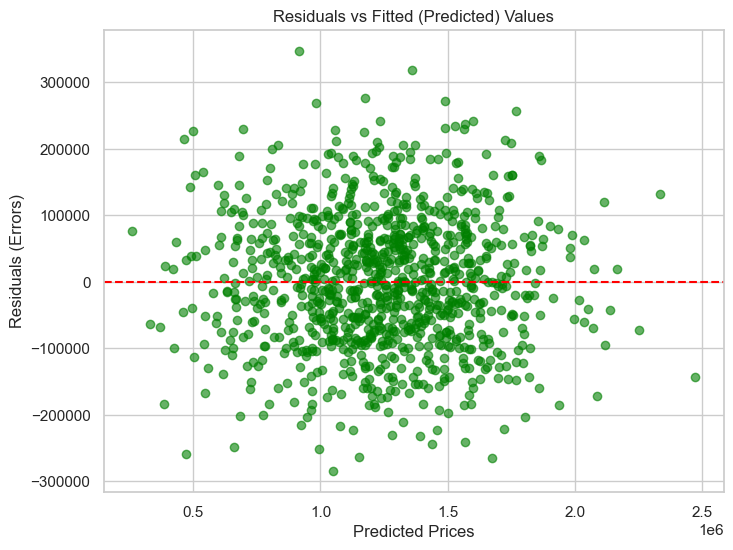

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()

# 3. Residuals (Errors) Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title("Residuals Plot")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.show()

# 4. Residuals vs Fitted (Predicted) values plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.title("Residuals vs Fitted (Predicted) Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.axhline(y=0, color='red', linestyle='--')  # Zero error line
plt.show()